# Project Title : Fraud Detection in Financial Transactions

## Project Summary
This project focuses on detecting fraudulent transactions in financial data using machine learning. The goal is to build a robust model that can predict fraud in real time, improving security and reducing financial losses. By leveraging exploratory data analysis (EDA), feature engineering, and machine learning techniques, the project aims to identify fraudulent transactions with high precision and recall.

### Project Goals:
- Develop a machine learning model to accurately predict fraudulent transactions.
- Perform comprehensive exploratory data analysis (EDA) to identify fraud patterns.
- Engineer relevant features to enhance model performance.
- Evaluate model performance using precision, recall, F1-score, and ROC-AUC.
- Assess the financial impact of fraud detection in reducing losses.

### Project Methodology

##### Data Exploration & Preprocessing
- Load and analyze transaction data.
- Handle missing values and perform feature engineering.
- Convert categorical variables into numerical representations.

##### Exploratory Data Analysis (EDA)
- Visualize transaction distributions, fraud occurrence over time, and correlations.
- Identify key fraud patterns.

##### Model Selection & Training
- Train different machine learning models (Logistic Regression, Random Forest, Gradient Boosting).
- Evaluate model performance using precision, recall, F1-score, and ROC-AUC.

##### Financial Impact Analysis
- Calculate estimated fraud amount caught.
- Determine operational costs and compute net financial impact.


### Expected Outcomes
- A machine learning model capable of accurately detecting fraudulent transactions.
- Comprehensive insights into fraud patterns and contributing factors.
- Reduction in financial losses through early fraud detection.
- A production-ready fraud detection model for integration into business systems.

### 1.Import Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib

In [3]:
import os
os.chdir("C:\\Users\\tanis\\Downloads\\Projects\\Fraud_Detection")

### 2. Load the Data

In [5]:
df = pd.read_csv("Fraud_Analysis_Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


### 3. Exploratory Data Analysis (EDA)

In [9]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2156,1,PAYMENT,4433.98,C583559449,10931.00,6497.02,M1895479349,0.00,0.00,0
2196,1,PAYMENT,1532.35,C1302877661,1346597.60,1345065.25,M1720797452,0.00,0.00,0
7204,6,CASH_OUT,44874.82,C295145298,0.00,0.00,C40075281,263201.31,308076.14,0
9595,7,PAYMENT,14609.16,C286222051,41425.00,26815.84,M2011580998,0.00,0.00,0
4998,3,PAYMENT,4798.43,C1524744833,9166.00,4367.57,M1254651534,0.00,0.00,0
4382,2,PAYMENT,7766.84,C1204030294,4097.88,0.00,M1258527853,0.00,0.00,0
5232,3,PAYMENT,1615.90,C2058526846,65633.71,64017.81,M1132219173,0.00,0.00,0
1509,1,TRANSFER,55536.86,C332365138,0.00,0.00,C392292416,915902.37,3420103.09,0
10430,7,PAYMENT,5744.40,C270447913,25925.00,20180.60,M1788579635,0.00,0.00,0
7085,6,PAYMENT,11506.17,C1965331677,206846.00,195339.83,M696664702,0.00,0.00,0


In [7]:
df.shape

(11142, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [14]:
df.duplicated().sum()

0

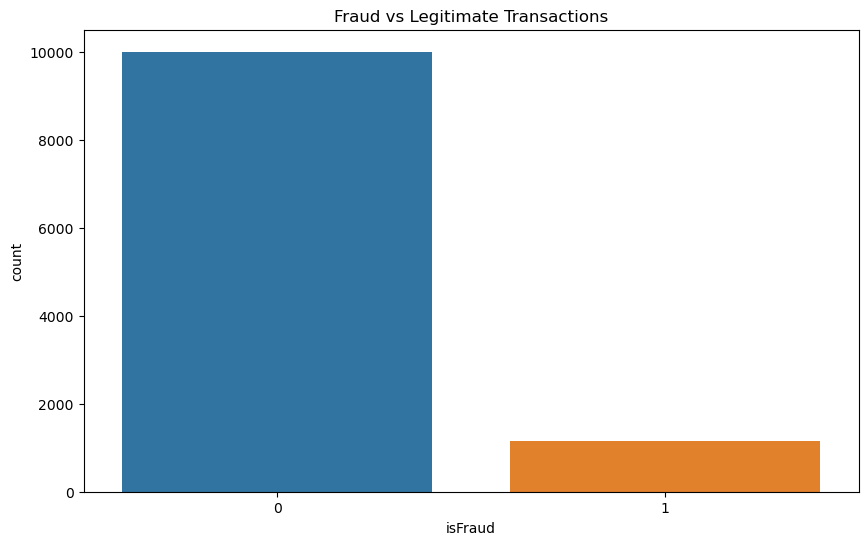

In [15]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Legitimate Transactions')
plt.show()

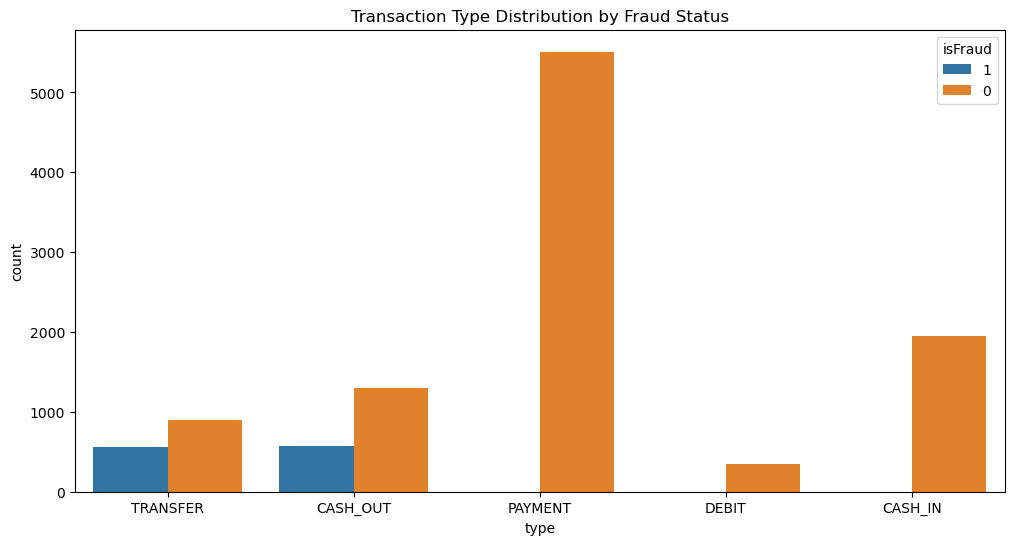

In [16]:
# Now re-run your visualization
df['isFraud'] = df['isFraud'].astype(str)
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type Distribution by Fraud Status')
plt.show()

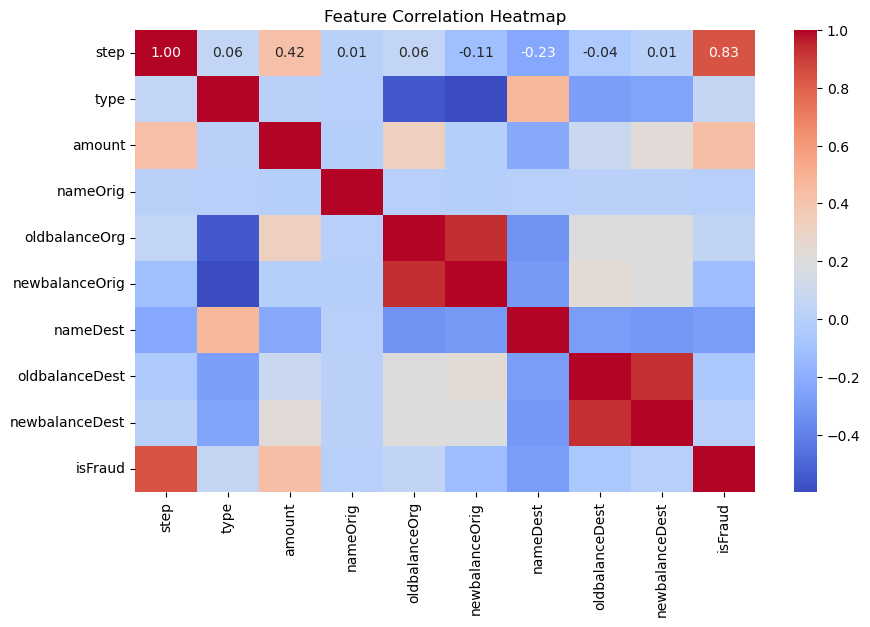

In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  # Convert strings to numbers

# Now compute and plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

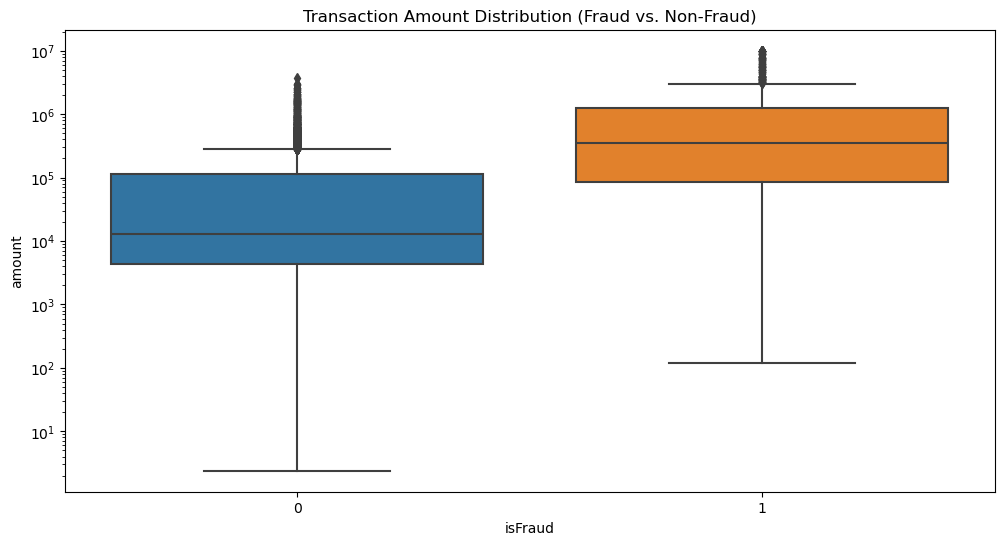

In [18]:
# Boxplot for Amount Distribution by Fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.yscale('log')  # Log scale for better visualization
plt.title('Transaction Amount Distribution (Fraud vs. Non-Fraud)')
plt.show()

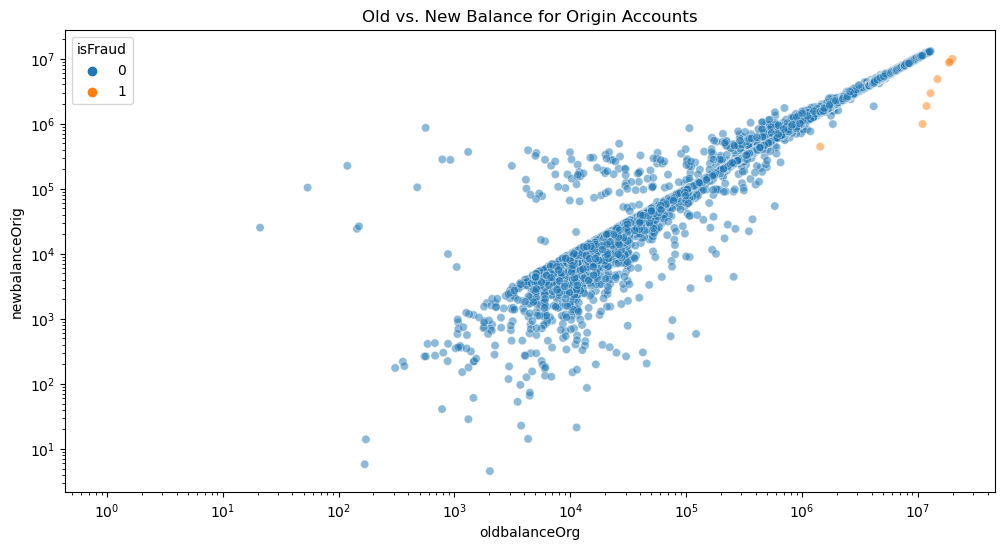

In [19]:
# Old vs. New Balance for Fraud vs. Non-Fraud
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['oldbalanceOrg'], y=df['newbalanceOrig'], hue=df['isFraud'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Old vs. New Balance for Origin Accounts')
plt.show()

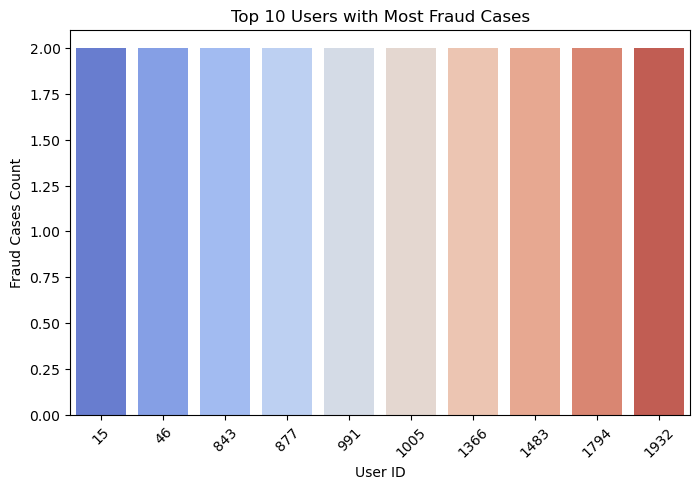

In [20]:
# Top 10 users with the most fraud cases (Bar chart)
top_fraud_users = df[df['isFraud'] == 1]['nameDest'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_fraud_users.index, y=top_fraud_users.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Users with Most Fraud Cases")
plt.xlabel("User ID")
plt.ylabel("Fraud Cases Count")
plt.show()

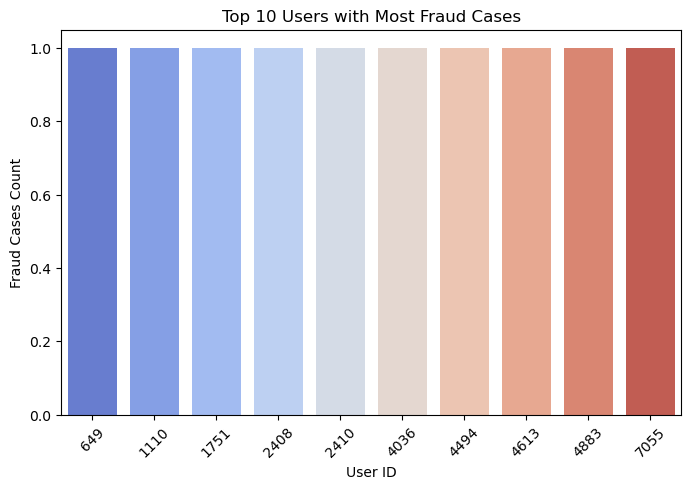

In [21]:
# Top 10 users with the most fraud cases (Bar chart)
top_fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_fraud_users.index, y=top_fraud_users.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Users with Most Fraud Cases")
plt.xlabel("User ID")
plt.ylabel("Fraud Cases Count")
plt.show()

C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


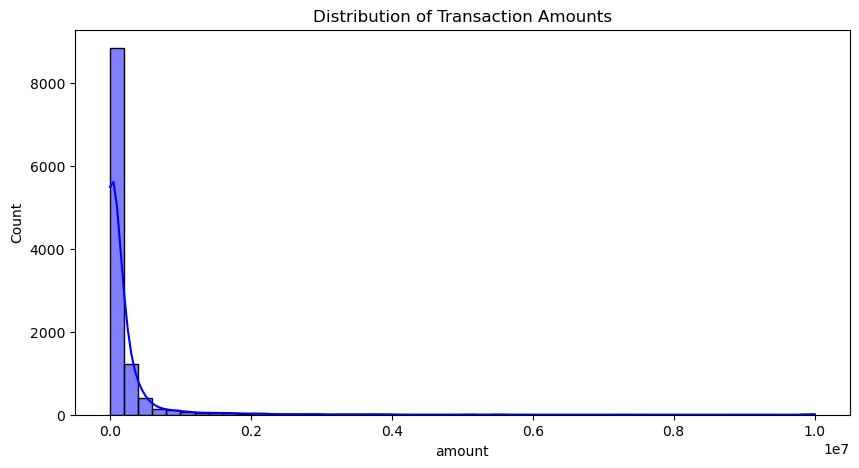

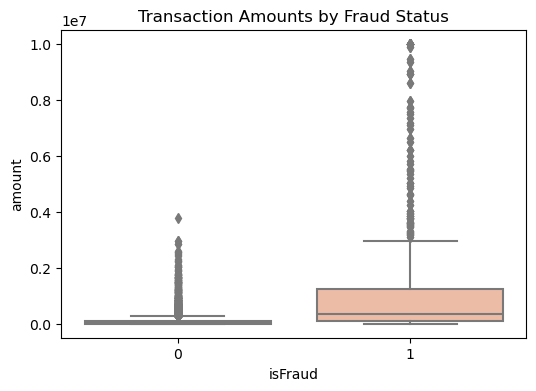

In [22]:
# Distribution of transaction amounts (Histogram & Boxplot)
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='isFraud', y='amount', data=df, palette='coolwarm')
plt.title("Transaction Amounts by Fraud Status")
plt.show()

### 4. Data Preprocessing & Feature Engineering

In [23]:
# Feature Engineering
categorical_cols = ['type']  
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [24]:
# Splitting Data
X = df.drop(columns=['isFraud'])
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5. Model Training

In [26]:
# Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

### 6. Model Evaluation & Financial Impact Analysis

In [27]:
# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[1999    0]
 [   8  222]]
Precision: 1.0
Recall: 0.9652173913043478
F1-Score: 0.9823008849557522
ROC-AUC Score: 0.9996998499249625


In [28]:
# Financial Impact Analysis
fraud_amount_caught = df.loc[(df['isFraud'] == 1) & (df.index.isin(y_test.index)), 'amount'].sum()
operational_costs = 0  # Example value, adjust based on real data
loss_saved = fraud_amount_caught - operational_costs
print("Estimated Fraud Amount Caught:", fraud_amount_caught)
print("Operational Costs:", operational_costs)
print("Loss Saved:", loss_saved)

Estimated Fraud Amount Caught: 244439253.01999998
Operational Costs: 0
Loss Saved: 244439253.01999998


In [29]:
# Save the trained model
joblib.dump(rf_model, "fraud_detection_model.pkl")

# Save the label encoder (if categorical encoding was applied)
joblib.dump(le, "label_encoder.pkl")
print("Model and preprocessing objects saved successfully!")

Model and preprocessing objects saved successfully!


#### Conclusion & Results

- The machine learning model achieved ,Precision:1.0, Recall:0.9652, F1-Score:0.9823, and ROC-AUC Score:0.9997
- Financial impact analysis estimated fraud prevention of $244439253.01999998.
- The fraud detection model can be integrated into real-time systems for enhanced security and financial protection.
- Further improvements can be made by fine-tuning hyperparameters and incorporating advanced deep learning techniques.